<a href="https://colab.research.google.com/github/umerzia-7001/Lesion_detection_Ham10000/blob/main/HAM10000_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Data

In [ ]:
!mkdir /root/.kaggle
!echo '{"username":"tahirazia","key":"e85d3296e5894d8cda02fef461ed2df8"}' > /root/.kaggle/kaggle.json

In [ ]:
!pip install kaggle
import json
import zipfile
import os
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
if not os.path.exists("/content/competitions/competition_name"):
    os.makedirs("/content/competitions/competition_name")
os.chdir('/content/competitions/competition_name')
#for file in os.listdir():
    #zip_ref = zipfile.ZipFile(file, 'r')
    #zip_ref.extractall()
    #zip_ref.close()

skin-cancer-mnist-ham10000.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Importing the required libraries
import pandas as pd # Pandas for making dataframes and extracting columns
from sklearn.model_selection import train_test_split # For generating train & test model
import numpy as np # For converting image to array and reshaping
from PIL import Image # For creating image from array
import csv # For generating csv files
import cv2
import matplotlib.pyplot as plt


## Data Preprocessing 

In [ ]:
def load_random_data(filename, labels = None):
  ''' This function takes in a file and labels and generate a random training set'''
  # reading the file as csv file and making a pandas dataframe
  temp_df = pd.read_csv(filename, header = None)
  # Appending a header to the data frame
  x = ''
  temp_df.columns = [x for i in range(784)]
  # Adding labels to the data frame
  temp_df['labels'] = labels
  
  # Using a function from sklearn.model_selection to generate a random data
  train_set , val_set = train_test_split(temp_df, test_size=0.1)
  # Returning the generated data
  return train_set, val_set

In [ ]:
def generate_grey(filename, file_generated):
  ''' This function generates a grayscale version of rgb pixels'''

  # reading the file as csv
  labels = pd.read_csv(filename)
  # Extracing the label column from the dataframe
  labels = labels["label"]
  # Creating a new file for gray csv
  file1 = open(file_generated, "w")
  # Instantiation of csv writer
  writer = csv.writer(file1)

  # Opening the file with csv
  with open(filename) as csv_file:
    # Reading the file with csv reader
    csv_reader = csv.reader(csv_file)
    # Skip headers
    next(csv_reader)
    # Iterating over each pixel set and converting it to greyscale
    for row in csv_reader:
        pixels = row[:-1] # without label
        pixels = np.array(pixels, dtype='uint8')
        pixels = pixels.reshape((28, 28,3))
        image = Image.fromarray(pixels)
        gray_image = cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2GRAY)
        grey_df = np.asarray(gray_image)
        grey_df = grey_df.reshape(1,784)
        writer.writerows(grey_df)
  # Returning the labels of each image
  return labels

In [ ]:
def data_normalization(X_train_, X_test_):
  '''This function is used to normalize the data set'''
  
  
  # Converting the inputs to numpy arrays
  X_train = np.asarray(X_train_.to_numpy())
  X_test = np.asarray(X_test_.to_numpy())
  
  # Applying the normalization formula 
  X_train = (X_train - X_train.mean())/X_train.std()
  X_test = (X_test - X_test.mean())/X_test.std()

  # Returning the normalized data
  return X_train, X_test

label = {
    0 : "Actinic Keratoses",
    1 : "Basal Cell Carcinoma",
    2 : 'Benign keratosis-like lesions',
    3 : 'Dermatofibroma',
    4 : 'Melanocytic nevi',
    5 : 'Melanoma',
    6 : 'Vascular skin'
}
def Upsampling(train):
  freqs = train["labels"].value_counts()
  freqs = freqs.sort_index()
  upsample_rate = [freqs.max() // freq for freq in freqs]
  for i in range(0, 7):
      if i == 4:
        continue
      train = train.append([train.loc[train['labels'] == i,:]]*(upsample_rate[i]-1), ignore_index=True)


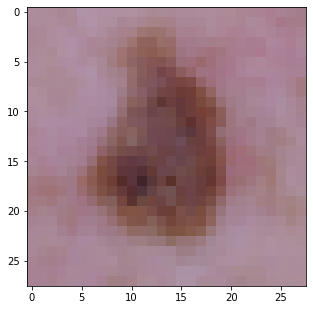

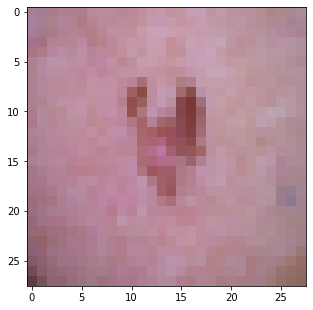

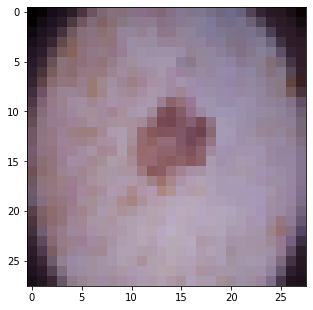

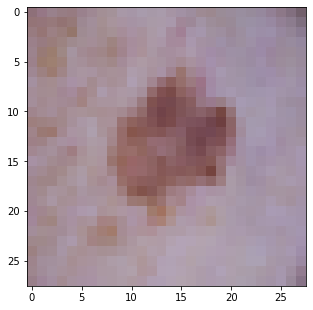

In [ ]:

import numpy as np
import csv
from PIL import Image    


with open('/content/competitions/competition_name/hmnist_28_28_RGB.csv') as csv_file:
    csv_reader = csv.reader(csv_file)

    # skip headers
    next(csv_reader)
    images=[]
    for row in csv_reader:
        pixels = row[:-1] # without label
        pixels = np.array(pixels, dtype='uint8')
        pixels = pixels.reshape((28, 28,3))
        image = Image.fromarray(pixels) # PIL image 
        images.append(image)


# plotting images  
for i in range(0,4):
  plt.figure(figsize=(5,10))
  plt.imshow(images[i+100])
  plt.show()
  

In [ ]:
# saving methods for preprocessing data
label = generate_grey("/content/competitions/competition_name/hmnist_28_28_RGB.csv", "grey.csv")

train_set_, val_set_ = load_random_data("grey.csv", label)

Upsampling( train_set_)

X_train_ = train_set_.drop('labels',axis=1)
y_train_ =train_set_['labels']
X_test_ = val_set_.drop('labels',axis=1)
y_test_ = val_set_['labels']


X_train, X_test = data_normalization(X_train_, X_test_)

In [ ]:

y_train = np.asarray(y_train_.to_numpy())
y_test = np.asarray(y_test_.to_numpy())

# validation set 




In [ ]:
# checking shapes of our data
print("Shape of training data")
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


print(X_train.shape,y_train.shape)

print("shape of testing data")
print(X_test.shape,y_test.shape)




Shape of training data
(9013, 28, 28, 1) (9013,)
shape of testing data
(1002, 28, 28, 1) (1002,)


## EDA

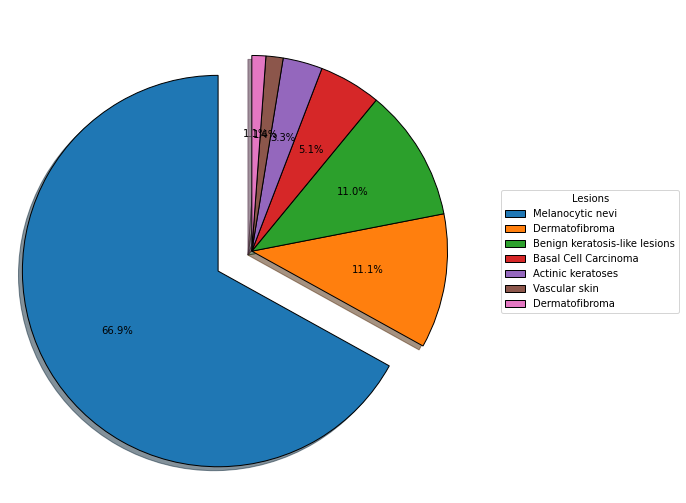

In [ ]:
# plotting frequency of labels
labels=['Melanocytic nevi','Dermatofibroma','Benign keratosis-like lesions', 'Basal Cell Carcinoma','Actinic keratoses','Vascular skin',
        'Dermatofibroma']
# respective lesion sizes as checked from labels 
sizes = [6705,1113, 1099, 514,327,142, 115]
# used to make major class look exploded
explode = (0.2, 0.0, 0.0, 0.0, 0.0, 0.0,0.0)

fig ,axes = plt.subplots(figsize=(10,9))
# used for label
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# using matplot's pie method to make a pie chart
wedges,texts,autotexts = axes.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90,explode = explode,wedgeprops = wp)

# Adding legend 
axes.legend(wedges, labels, 
          title ="Lesions", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 

plt.show()

## Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


# using keras function for augmenting data
datagen=ImageDataGenerator(
    featurewise_center=False,  # set input mean  over the dataset
    samplewise_center=False,  # set each sample mean 
    featurewise_std_normalization=True,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=True,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.9, 1.25],  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True,
    data_format='channels_last')  # randomly flip images
    

 # augmenting training data       
datagen.fit(X_train)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


## Model and Training

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPool2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from keras.layers import Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

classes= 7 #len(labels)
input_shape=(28,28,1)
def model(input_shape,num_classes):


#model with 5 layers 

  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
  model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
  model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.40))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  return model


model = model(input_shape_,classes)
# displaying model summary , number of parameters
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)        

In [ ]:
'''
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
# importing VGG16 CNN from keras.application
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=input_shape))  #base_Model
hModel = bModel.output #head_Model

# making out own dense layers *** transfer learning ***
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(7, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False'''

'\nfrom tensorflow.keras.applications import VGG16\nfrom tensorflow.keras.layers import Input\nfrom tensorflow.keras.models import Model\n# importing VGG16 CNN from keras.application\nbModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=input_shape))  #base_Model\nhModel = bModel.output #head_Model\n\n# making out own dense layers *** transfer learning ***\nhModel = AveragePooling2D(pool_size=(4, 4))(hModel)\nhModel = Flatten(name="flatten")(hModel)\nhModel = Dense(64, activation="relu")(hModel)\nhModel = Dropout(0.5)(hModel)\nhModel = Dense(7, activation="softmax")(hModel)\nmodel = Model(inputs=bModel.input, outputs=hModel)\nfor layer in bModel.layers:\n    layer.trainable = False'

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# specifying optimizer for our model
optimizer = Adam(lr=0.001)


 early stopping -> which halts model training if loss does not improve for specific iterations
cb=EarlyStopping(patience=5,monitor='val_loss',verbose=1,restore_best_weights=True)

# modelcheckpoint -> which makes checkpoint after each iteration
#cp=ModelCheckpoint('bestmodel.', monitor='loss', verbose=1, save_best_only=True)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               monitor='val_loss',
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-5)
 
# compiling model 
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# fitting model / training 
hist=model.fit(datagen.flow(X_train,y_train, batch_size=32),validation_data=(X_test,y_test),epochs = 15,callbacks=[lr_reducer], steps_per_epoch=200)
                             

Epoch 1/15
200/200 [==============================] - 36s 182ms/step - loss: 0.9817 - accuracy: 0.6698 - val_loss: 4.7513 - val_accuracy: 0.6497
Epoch 2/15
200/200 [==============================] - 36s 182ms/step - loss: 0.9290 - accuracy: 0.6788 - val_loss: 3.5253 - val_accuracy: 0.6467
Epoch 3/15
200/200 [==============================] - 37s 185ms/step - loss: 0.9062 - accuracy: 0.6830 - val_loss: 5.0614 - val_accuracy: 0.6417
Epoch 4/15
200/200 [==============================] - 36s 181ms/step - loss: 0.9037 - accuracy: 0.6866 - val_loss: 4.7343 - val_accuracy: 0.6437
Epoch 5/15
200/200 [==============================] - 36s 182ms/step - loss: 0.8974 - accuracy: 0.6862 - val_loss: 4.0350 - val_accuracy: 0.6377
Epoch 6/15
200/200 [==============================] - 37s 183ms/step - loss: 0.8886 - accuracy: 0.6939 - val_loss: 4.2164 - val_accuracy: 0.6437
Epoch 7/15
200/200 [==============================] - 36s 180ms/step - loss: 0.8641 - accuracy: 0.6946 - val_loss: 4.8176 - val_ac

## Evaluating our model 

In [ ]:

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
